In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import pickle

from scipy.misc import imrotate

In [4]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### A function to initialize a MLP with given parameters

In [5]:
def build_network(W, B): 
    x = tf.placeholder(tf.float32, shape=[784, None]) #inputs 
    y = tf.placeholder(tf.float32, shape=[10, None]) #outputs
    
    weights = {
    'W_h1': tf.constant(W[0], dtype=tf.float32),
    'W_h2': tf.constant(W[1], dtype=tf.float32),
    'W_h3': tf.constant(W[2], dtype=tf.float32),
    'W_h4': tf.constant(W[3], dtype=tf.float32),
    'W_out': tf.constant(W[4], dtype=tf.float32)
}
    biases = {
    'b_1': tf.constant(B[0], dtype=tf.float32),
    'b_2': tf.constant(B[1], dtype=tf.float32),
    'b_3': tf.constant(B[2], dtype=tf.float32),
    'b_4': tf.constant(B[3], dtype=tf.float32),
    'b_out': tf.constant(B[4], dtype=tf.float32)
}

    h_1 = tf.nn.sigmoid(tf.matmul(weights['W_h1'], x) + biases['b_1'])
    h_2 = tf.nn.sigmoid(tf.matmul(weights['W_h2'], h_1) + biases['b_2'])
    h_3 = tf.nn.sigmoid(tf.matmul(weights['W_h3'], h_2) + biases['b_3'])
    h_4 = tf.nn.sigmoid(tf.matmul(weights['W_h4'], h_3) + biases['b_4'])
    h_out = tf.exp(tf.matmul(weights['W_out'], h_4) + biases['b_out'])
    y_ = tf.divide(h_out, tf.reduce_sum(h_out))
    
    correct_prediction = tf.equal(tf.argmax(y,0), tf.argmax(y_,0))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    activations = {'h_1': h_1, 'h_2': h_2, 'h_3': h_3, 'h_4': h_4, 'h_out': h_out, 'y_':y_}
    
    measures = {'correct_prediction' : correct_prediction, 'accuracy': accuracy}
    
    return x, y, weights, biases, activations, measures



### Loading the pretrained parameters for the networks

#### AER: pretrained parameters from autoencoder trained with noiseless rotated MNIST, softmax trained with regular MNIST
#### AEUR: pretrained parameters from autoencoder trained with noiseless unrotated MNIST, softmax trained with regular MNIST

In [6]:
AER_file = '/home/claudia/Dokumente/Uni/lab_rotation_TU/compare_AER_AEUR/AER_finetuned_params_complete.p'
AER_params = pickle.load(open(AER_file, 'rb'))

AEUR_file = '/home/claudia/Dokumente/Uni/lab_rotation_TU/compare_AER_AEUR/AEUR_finetuned_params_complete.p'
AEUR_params = pickle.load(open(AEUR_file, 'rb'))

In [7]:
for key in AEUR_params: 
    print(key)

Acc_finetuning
Acc_retrainingSoftmax
Accuracy_afterSoftmax
bias_incl_softmax
bias_final
Accuracy_afterFinetuning
CE_retrainingSoftmax
weights_incl_softmax
weights_final
CE_finetuning


In [21]:
W_AER = AER_params['weights_incl_softmax']
B_AER = AER_params['bias_incl_softmax']

W_AEUR = AEUR_params['weights_incl_softmax']
B_AEUR = AEUR_params['bias_incl_softmax']

### The training procedure

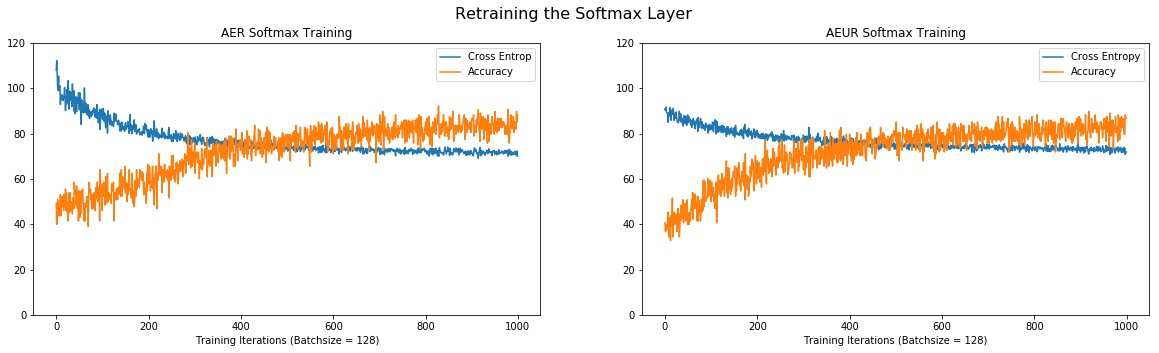

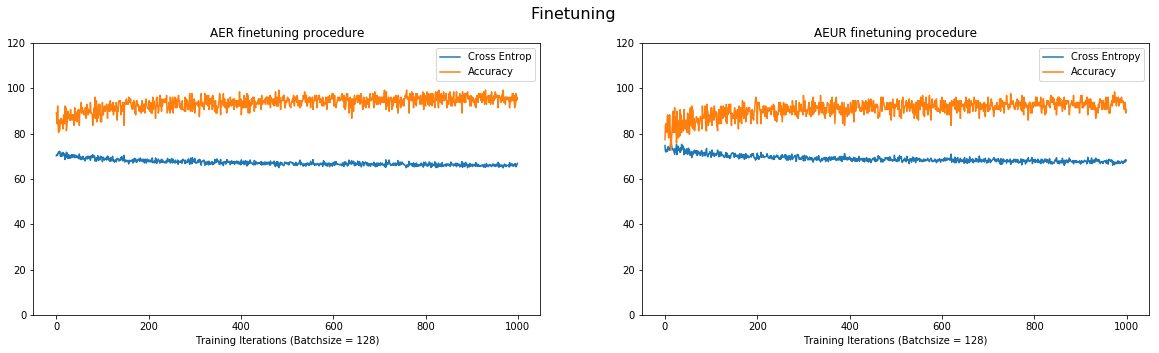

In [9]:
plt.figure(figsize = (20, 5))
plt.suptitle('Retraining the Softmax Layer', size =16) 

plt.subplot(1,2,1)    
plt.plot(AER_params['CE_retrainingSoftmax'], label = 'Cross Entrop')
plt.plot(100*AER_params['Acc_retrainingSoftmax'], label = 'Accuracy')
plt.title('AER Softmax Training')
plt.xlabel('Training Iterations (Batchsize = 128)')
plt.ylim([0, 120])
plt.legend()

plt.subplot(1,2,2)    
plt.plot(AEUR_params['CE_retrainingSoftmax'], label = 'Cross Entropy')
plt.plot(100*AEUR_params['Acc_retrainingSoftmax'], label = 'Accuracy')
plt.title('AEUR Softmax Training')
plt.xlabel('Training Iterations (Batchsize = 128)')
plt.ylim([0, 120])
plt.legend()

plt.show()

plt.figure(figsize = (20, 5))
plt.suptitle('Finetuning', size =16) 

plt.subplot(1,2,1)    
plt.plot(AER_params['CE_finetuning'], label = 'Cross Entrop')
plt.plot(100*AER_params['Acc_finetuning'], label = 'Accuracy')
plt.title('AER finetuning procedure')
plt.xlabel('Training Iterations (Batchsize = 128)')
plt.ylim([0, 120])
plt.legend()

plt.subplot(1,2,2)    
plt.plot(AEUR_params['CE_finetuning'], label = 'Cross Entropy')
plt.plot(100*AEUR_params['Acc_finetuning'], label = 'Accuracy')
plt.title('AEUR finetuning procedure')
plt.xlabel('Training Iterations (Batchsize = 128)')
plt.ylim([0, 120])
plt.legend()

plt.show()

### Initializing the 2 Neworks

In [22]:
x_AER, y_AER, weights_AER, bias_AER, activations_AER, measures_AER = build_network(W_AER, B_AER) 

In [23]:
x_AEUR, y_AEUR, weights_AEUR, bias_AEUR, activations_AEUR, measures_AEUR = build_network(W_AEUR, B_AEUR) 

In [24]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

### Build a dictionary conatining the indices of each type of digit in the test set

In [31]:
single_numbers_test = {}
for i in range(10): 
    single_numbers_test['only_'+str(i)] = []
    
for idx in range(len(mnist.test.images)):
    d = np.flatnonzero(mnist.test.labels[idx])[0] 
    single_numbers_test['only_'+str(d)].append(idx)
    
pickle.dump(single_numbers_test, open( "mnist_test_digit_indices.p", "wb" ) )

### Building the rotated dataset

In [30]:
DATA_POINTS = mnist.test.images.shape[0]
DATA_SHAPE = mnist.test.images.shape

mnist_30 = np.zeros(DATA_SHAPE)
mnist_60 = np.zeros(DATA_SHAPE)
mnist_90 = np.zeros(DATA_SHAPE)

for i in range(DATA_POINTS):
    im = np.reshape(mnist.test.images[i], (28,28))
    im30 = imrotate(im, 30, interp='bilinear')
    im60 = imrotate(im, 60, interp='bilinear')
    im90 = imrotate(im, 90, interp='bilinear')
    
    mnist_30[i] = np.reshape(im30, (784,))
    mnist_60[i] = np.reshape(im60, (784,))
    mnist_90[i] = np.reshape(im90, (784,))

DATA_SETS = {'mnist': mnist.test.images, 'mnist_30': mnist_30, 'mnist_60': mnist_60, 'mnist_90': mnist_90}
LABELS = mnist.test.labels
pickle.dump( DATA_SETS, open( "rotated_mnist_test.p", "wb" ) )

In [32]:
pickle.dump(LABELS, open( "mnist_test_lables.p", "wb" ) )

### Comparing the digitwise accuracy of the two networks

In [15]:
def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%s %%'  %np.around(100*height, 2),
                ha='center', va='bottom')

def multiple_bar_plot(data, positions, labels, title, x_label = None , y_label = None, \
                      x_ticks = None, y_ticks = None, \
                      x_lim = None, y_lim = None, bar_width = 0.40, opacity = 0.8, \
                      height_label = True, show = True, fig = None, legend = True): 
    
    if fig == None:
        fig, ax = plt.subplots(figsize = (15,6))

    for i in range(len(data)): 
        rects = plt.bar(positions + i*bar_width, data[i], bar_width, alpha = opacity,label = labels[i])
        if height_label: 
            autolabel(rects, ax)
    
    plt.title(title, size = 16)
    
    if not (x_label == None): 
        plt.xlabel(x_label, size = 16)
        
    if not (y_label == None): 
        plt.ylabel(y_label, size = 16)

    if not (x_ticks == None): 
        plt.xticks(positions + bar_width *.5, x_ticks, size = 14)
        
    if not (y_ticks == None):
        plt.yticks(np.arange(0,1,0.1))

    if not (x_lim == None): 
        plt.xlim(x_lim)
        
    if not (y_lim == None): 
        plt.ylim(y_lim)
        
    if legend:
        plt.legend(bbox_to_anchor=(1, .5), prop={'size': 16})  
        
    #plt.tight_layout()
    
    if show: 
        plt.show()

### Calculating the prediction accuracy

In [25]:
accs = np.zeros((10, 8))

for j in range(10): 
    
    idxs = single_numbers_test['only_' + str(j)][:800]
    
    accs[j, 0] = sess.run(measures_AER['accuracy'], feed_dict={x_AER: mnist.test.images[idxs].T, y_AER: mnist.test.labels[idxs].T})
    accs[j, 1]  = sess.run(measures_AEUR['accuracy'], feed_dict={x_AEUR: mnist.test.images[idxs].T, y_AEUR: mnist.test.labels[idxs].T})
   
    accs[j, 2]  = sess.run(measures_AER['accuracy'], feed_dict={x_AER: mnist_30[idxs].T, y_AER: mnist.test.labels[idxs].T})
    accs[j, 3]  = sess.run(measures_AEUR['accuracy'], feed_dict={x_AEUR: mnist_30[idxs].T, y_AEUR: mnist.test.labels[idxs].T})
    
    accs[j, 4]  = sess.run(measures_AER['accuracy'], feed_dict={x_AER: mnist_60[idxs].T, y_AER: mnist.test.labels[idxs].T})
    accs[j, 5]  = sess.run(measures_AEUR['accuracy'], feed_dict={x_AEUR: mnist_60[idxs].T, y_AEUR: mnist.test.labels[idxs].T})
    
    accs[j, 6]  = sess.run(measures_AER['accuracy'], feed_dict={x_AER: mnist_90[idxs].T, y_AER: mnist.test.labels[idxs].T})
    accs[j, 7]  = sess.run(measures_AEUR['accuracy'], feed_dict={x_AEUR: mnist_90[idxs].T, y_AEUR: mnist.test.labels[idxs].T})


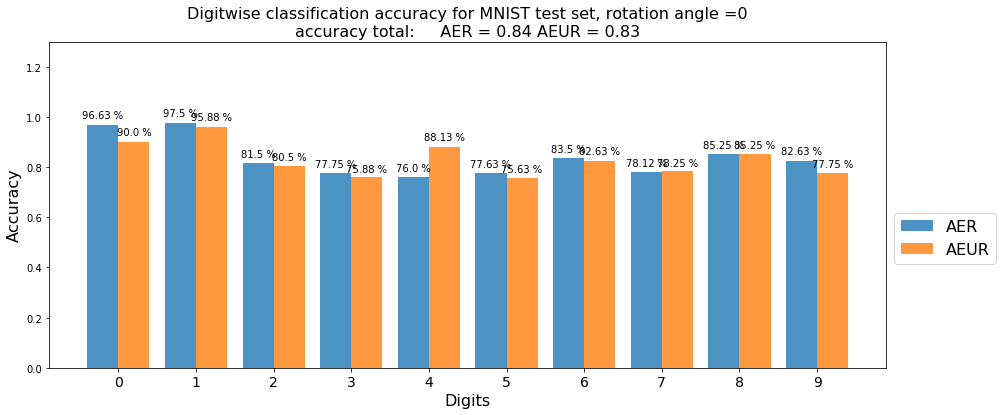

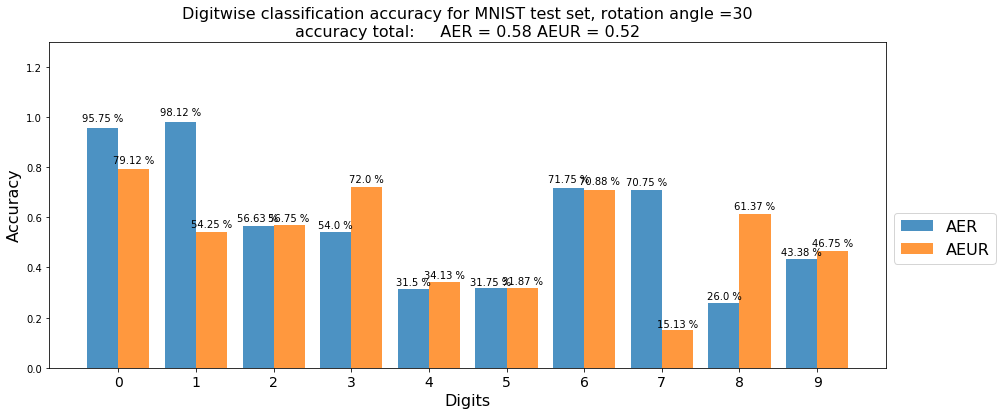

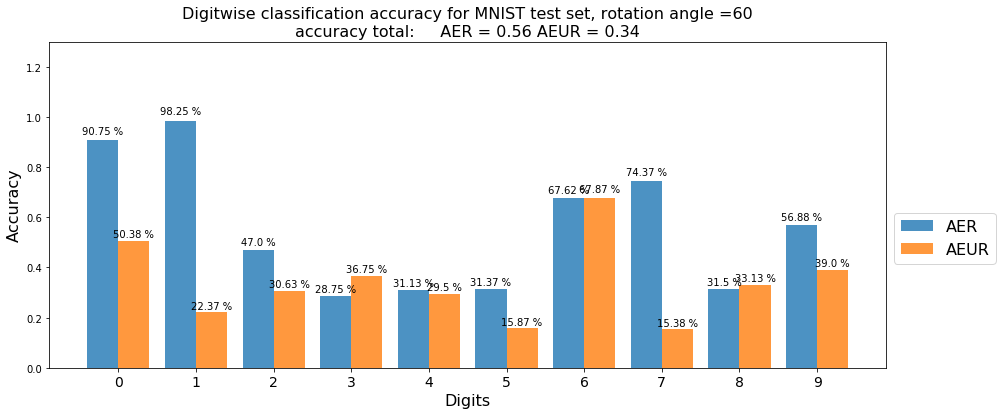

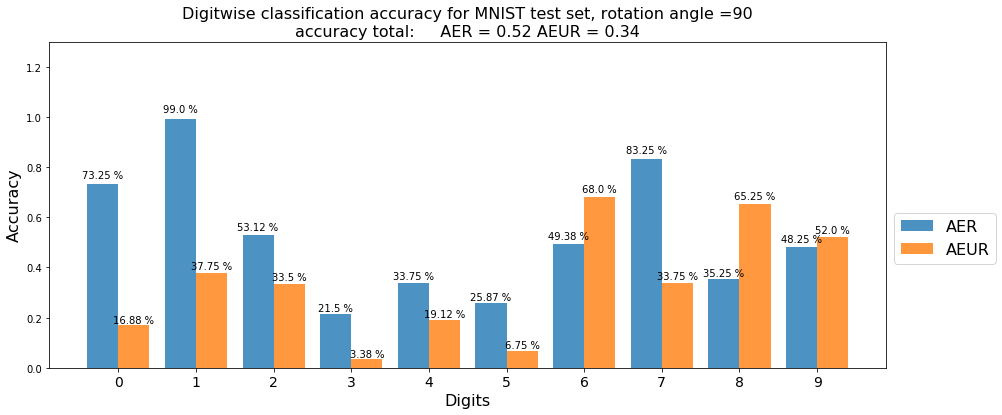

In [26]:
positions = np.arange(0,10,1)
labels = ['AER', 'AEUR']
x_ticks = [i for i in range(10)]
y_lim = [0, 1.3]
angles = [0, 30, 60, 90]
x_label = 'Digits'
y_label = 'Accuracy'

for i in range(4): 
    
    acc_AER = accs[:,i*2]
    acc_AEUR = accs[:, i*2 +1]
    data = [acc_AER, acc_AEUR]

    title = 'Digitwise classification accuracy for MNIST test set, rotation angle =' \
    + str(angles[i]) + '\n' + 'accuracy total:     AER = ' + \
    str(np.round(np.mean(acc_AER),2)) + ' AEUR = ' + str(np.round(np.mean(acc_AEUR),2)) 


    multiple_bar_plot(data, positions, labels, title, x_ticks= x_ticks, y_lim = y_lim \
                      , x_label = x_label, y_label = y_label)


As could be expected the network initialized with the rotation-trained weights show generally higher accuracy. This difference gets stronger as the roatation angle increases. 

For the digit 1 we see a strong difference in classification accuracy between AER and AEUR, therfore it might be interesting to restrict further investigations to this number

In [27]:
layers = ['h_1', 'h_2', 'h_3', 'h_4']
LAYERS = len(layers)
AER_layer_activations = {}
AEUR_layer_activations= {}

for j, dat in enumerate(DATA_SETS):
    AER_layers = np.zeros(len(layers))
    AEUR_layers = np.zeros(len(layers))
    for i,lay in enumerate(layers):
        AER_layers[i] = np.mean(sess.run(activations_AER[lay], feed_dict={x_AER: DATA_SETS[dat].T, y_AER: LABELS.T}))
        AEUR_layers[i] = np.mean(sess.run(activations_AEUR[lay], feed_dict={x_AEUR: DATA_SETS[dat].T, y_AEUR: LABELS.T}))
    AER_layer_activations[dat] = AER_layers
    AEUR_layer_activations[dat] = AEUR_layers

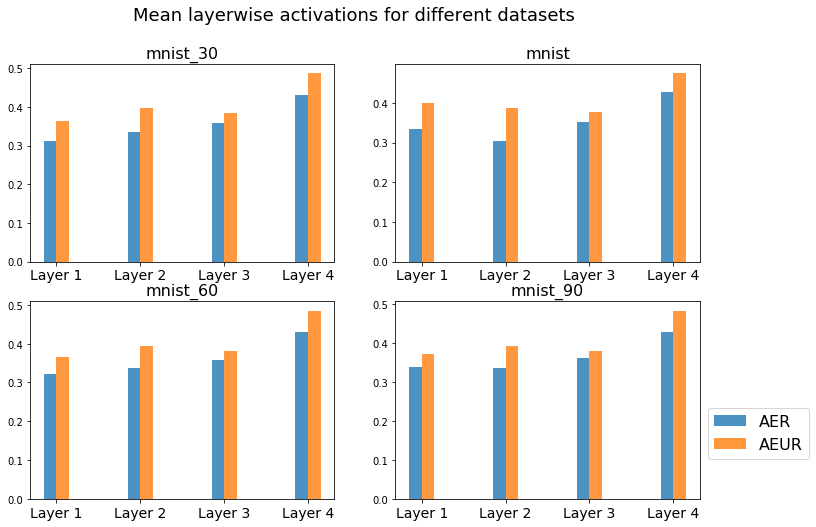

In [28]:
fig = plt.figure(figsize = (12, 8))
plt.suptitle('Mean layerwise activations for different datasets', size = 18)
i=1
for dat in DATA_SETS.keys():
    compare_acts = [AER_layer_activations[dat], AEUR_layer_activations[dat]]
    positions = np.arange(1, 5, 1)
    labels = ['AER', 'AEUR']
    title = dat
    x_ticks = ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4']
    plt.subplot(2,2,i)
    if i < 4:
        multiple_bar_plot(compare_acts, positions, labels, title, height_label = False, \
                      bar_width = .15, show = False, fig = fig, legend = False, x_ticks = x_ticks)
    else: 
        multiple_bar_plot(compare_acts, positions, labels, title, height_label = False, \
                      bar_width = .15, show = False, fig = fig, x_ticks = x_ticks)
    i += 1
plt.show()

Overall we see that the network trained with unrotated digits shows higher activations through all layers. 

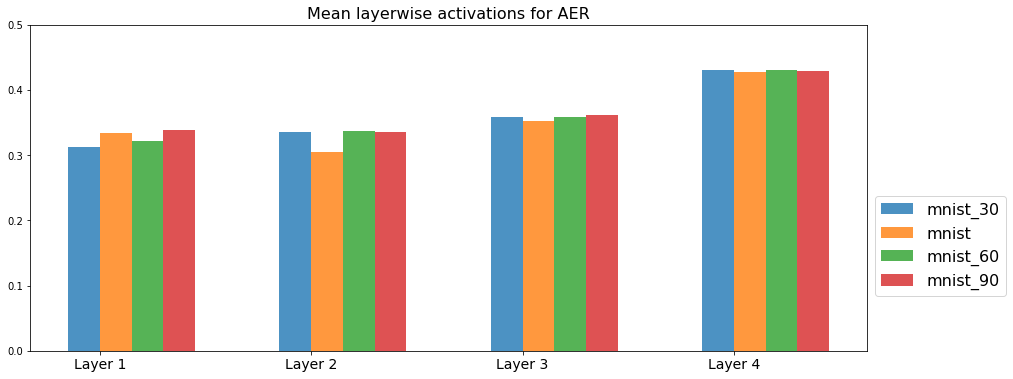

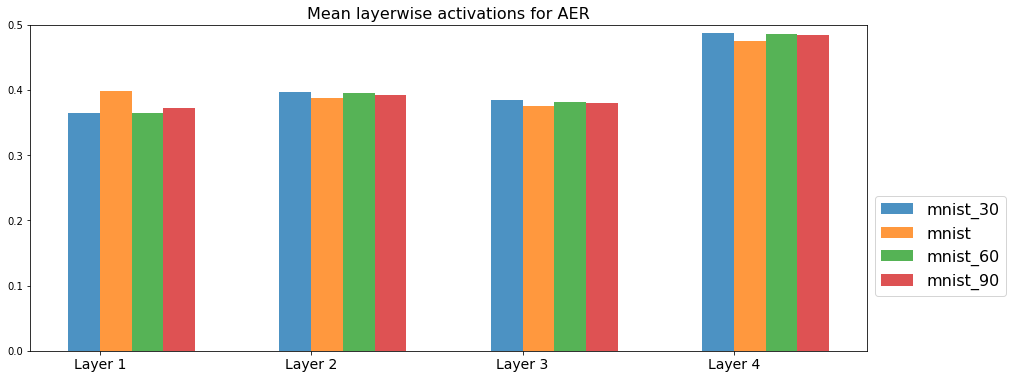

In [29]:
compare_acts_AER = [AER_layer_activations[dat] for dat in DATA_SETS.keys()]
compare_acts_AEUR = [AEUR_layer_activations[dat] for dat in DATA_SETS.keys()]

positions = np.arange(1, 5, 1)
labels = [dat for dat in DATA_SETS.keys()]
title_AER = 'Mean layerwise activations for AER'
title_AEUR = 'Mean layerwise activations for AER'
x_ticks = ['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4']

multiple_bar_plot(compare_acts_AER, positions, labels, title_AER, \
                  height_label = False, bar_width = .15, y_lim = [0,.5], x_ticks = x_ticks )
multiple_bar_plot(compare_acts_AEUR, positions, labels, title_AEUR, \
                  height_label = False, bar_width = .15, y_lim = [0,.5], x_ticks = x_ticks  )


For both networks the mean activation increases with the layers. The rotation of the data sets, on the other hand, does not seem to make any significant difference here. 